In [44]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.mixture import GaussianMixture

pd.set_option('display.max_rows',-1)
%matplotlib inline 

In [2]:
df = pd.read_csv('/home/jose/Documentos/unam/data/corruption-index/history.csv')

In [3]:
df.shape

(176, 9)

In [4]:
df.head()

,CPI 2016 Rank,Country,Country Code,Region,CPI 2016 Score,CPI 2015 Score,CPI 2014 Score,CPI 2013 Score,CPI 2012 Score
0,1,New Zealand,NZL,Asia Pacific,90,88.0,91.0,91.0,90.0
1,1,Denmark,DNK,Europe and Central Asia,90,91.0,92.0,91.0,90.0
2,3,Finland,FIN,Europe and Central Asia,89,90.0,89.0,89.0,90.0
3,4,Sweden,SWE,Europe and Central Asia,88,89.0,87.0,89.0,88.0
4,5,Switzerland,CHE,Europe and Central Asia,86,86.0,86.0,85.0,86.0


In [5]:
df.columns

Index([u'CPI 2016 Rank', u'Country', u'Country Code', u'Region',
       u'CPI 2016 Score', u'CPI 2015 Score', u'CPI 2014 Score',
       u'CPI 2013 Score', u'CPI 2012 Score'],
      dtype='object')

In [6]:
lst_cpi = ['CPI %d Score'%x for x in range(2012,2017)]

In [7]:
df['v_mean_score'] = df[lst_cpi].mean(axis=1)
df['v_delta_ini_fin'] = (df[lst_cpi[-1]]-df[lst_cpi[0]])/df[lst_cpi[0]]


In [8]:
for i,l in enumerate([list(x) for x in zip(lst_cpi[1:],lst_cpi)]):
    df['dummy_%d'%i] = (df[l[0]]>df[l[-1]]).astype(int)

In [9]:
df['v_ninc'] =df[[x for x in df.columns if x.startswith('dummy')]].sum(axis=1) 

In [10]:
df = df.loc[~df.v_delta_ini_fin.isnull()]

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df.shape

(172, 16)

In [13]:
var = [x for x in df.columns if x[:2]=='v_']

In [14]:
X= df[var].copy()

In [15]:
X.shape

(172, 3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f593c6355d0>,
      dtype=object)

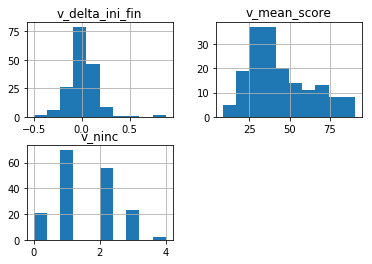

In [16]:
X.hist()

In [17]:
X.describe()

,v_mean_score,v_delta_ini_fin,v_ninc
count,172.000000,172.000000,172.000000
mean,43.189826,0.010991,1.505814
std,19.742871,0.161746,0.914452
min,8.400000,-0.500000,0.000000
25%,28.600000,-0.067045,1.000000
50%,37.800000,0.000000,1.000000
75%,56.266667,0.072090,2.000000
max,90.800000,0.875000,4.000000


In [18]:
sc = StandardScaler()
mm = MinMaxScaler()
mds= MDS(n_components=2)
pca = PCA(n_components=2)

In [19]:
sc.fit(X)
mm.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

In [21]:
pca.fit(Xs)
print pca.explained_variance_ratio_.cumsum()
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

[0.50768345 0.84600436]


In [22]:
Xmds = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

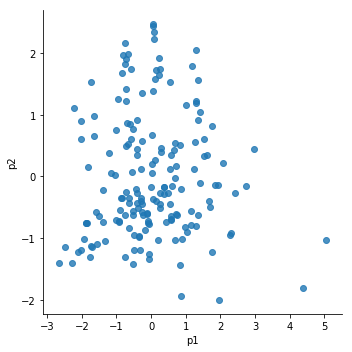

In [23]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

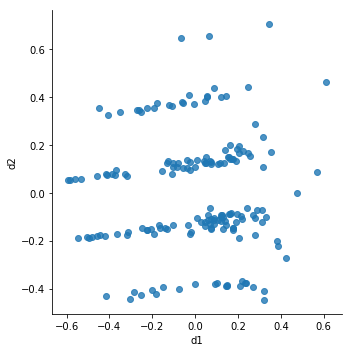

In [24]:
sns.lmplot(data=Xmds,x='d1',y='d2',fit_reg=False)

In [25]:
lst_in = []
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(Xmm)
    lst_in.append(km.inertia_)

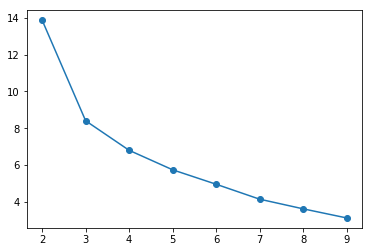

In [26]:
plt.plot(range(2,10),lst_in,marker='o')

In [27]:
agg = AgglomerativeClustering(n_clusters=4)
km = KMeans(n_clusters=4)
gmm = GaussianMixture(n_components=4)

In [28]:
km.fit(Xmm[var])
gmm.fit(Xmm[var])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [29]:
X['cl_agg'] =Xp['cl_agg'] =Xmds['cl_agg'] = df['cl_agg'] = Xmm['cl_agg']= Xs['cl_agg'] =agg.fit_predict(Xmm)

In [30]:
X['cl_km'] =Xp['cl_km'] =Xmds['cl_km'] = df['cl_km'] = Xmm['cl_km']= Xs['cl_km'] =km.predict(Xmm[var])

In [31]:
X['cl_gmm'] =Xp['cl_gmm'] =Xmds['cl_gmm'] = df['cl_gmm'] = Xmm['cl_gmm']= Xs['cl_gmm'] =gmm.predict(Xmm[var])  

In [32]:
Xs[var+['cl_km']].groupby('cl_km').mean()

,v_mean_score,v_delta_ini_fin,v_ninc
cl_km,,,
0,-0.454608,0.576337,0.876595
1,1.281107,-0.346961,-0.868103
2,-0.636326,-0.427255,-0.781060
3,1.410884,0.119460,0.990663


In [33]:
from analytics_tools.analytics_tools3 import freq_discrete

In [39]:
freq_discrete(Xs,'cl_km',0)

Frequency distribution table for variable: cl_km


   Freq       Pct  Accum Freq  Accum Pct
0    59  0.343023          59   0.343023
1    28  0.162791          87   0.505814
2    63  0.366279         150   0.872093
3    22  0.127907         172   1.000000




In [35]:
aux = df.pivot_table(index='Region',columns='cl_km',aggfunc='count',values='Country').reset_index()

In [36]:
aux

cl_km,Region,0,1,2,3
0,Americas,6.0,7.0,15.0,3.0
1,Asia Pacific,12.0,7.0,7.0,2.0
2,Europe and Central Asia,20.0,11.0,6.0,13.0
3,Middle East and North Africa,6.0,NaN,9.0,3.0
4,Sub-Saharan Africa,15.0,3.0,26.0,1.0


In [37]:
for i in range(4):
    aux[i]/=aux[i].sum()

In [38]:
aux

cl_km,Region,0,1,2,3
0,Americas,0.101695,0.250000,0.238095,0.136364
1,Asia Pacific,0.203390,0.250000,0.111111,0.090909
2,Europe and Central Asia,0.338983,0.392857,0.095238,0.590909
3,Middle East and North Africa,0.101695,NaN,0.142857,0.136364
4,Sub-Saharan Africa,0.254237,0.107143,0.412698,0.045455


In [48]:
df.loc[Xs.cl_km==2][['Country']+var].sort_values('Country',ascending=True)

,Country,v_mean_score,v_delta_ini_fin,v_ninc
105,Algeria,35.2,0.000000,1
92,Argentina,34.2,0.028571,1
96,Benin,36.8,0.000000,1
109,Bolivia,34.0,-0.029412,1
82,Bosnia and Herzegovina,40.0,-0.071429,1
75,Bulgaria,41.4,0.000000,1
71,Burkina Faso,38.8,0.105263,1
152,Cambodia,21.0,-0.045455,1
143,Cameroon,26.2,0.000000,1
157,Central African Republic,23.8,-0.230769,0
